Do an Exploratory Data Analysis, including the necessary data transformation and cleaning, on the data (or a part of) you have decided to use for your business case. That is, load the data into R in a Jupyter notebook. Look at what variables you have and what their scale of measurement and types are. Do the necessary transformation such that the variables are in a format in R you can work with. Then investigate the individual variables and their distribution using plotting and descriptive statistics. Finally, select some pairs of variable for which you think their could be an interesting relationship and plot the relationship and calculate the relevant descriptive statistics. Finally, upload the notebook here.

<h1> Exploratory data analysis <h1>
<h3> <i>The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. The dataset is found on the website “Kaggle.com” in a notebook. 
The goal of this business case is to find patterns in the data using analysis, that can tell us why workers quit their job <i> <h3>

<h2> Loading the data <h2>

In [199]:
#data2 <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE)
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h2> Exploring the basics of the dataset <h2>


In [200]:
#We see that the dataset contains 1470 rows and 35 coloumns.
dim(df)

# Through the str() function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
str(df)

# This also applies for columns with binary output eg. 'Attrition' with "yes"/"no" values, or columns a few multiple values eg BusinessTravel with three diffent values.
unique(df$BusinessTravel)

# In the dataset we also see, that there is no missing values NA.
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h2> Cleaning the data <h2>
<h4> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        step 1: Remove irrelevant columns<br>
        step 2: Remove quotation ("") from the dataset <br>
        step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [201]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome", 
    "EducationField", "EnvironmentSatisfaction","Gender","HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction",
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole",
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), ordered = TRUE)
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), ordered = TRUE)
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female"), ordered = TRUE)
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), ordered = TRUE)
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced"), ordered = TRUE)
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6), ordered = TRUE)
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)


<h2> Visualizing and understanding the data in depth <h2>
<h4> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start with invenstigation the categorical value 'attrition' <br><br>
     
Attration is defines as: <i> "the gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." <i> 
<!--
<br>
<br>
<br>
--> 
<i>
<h4>

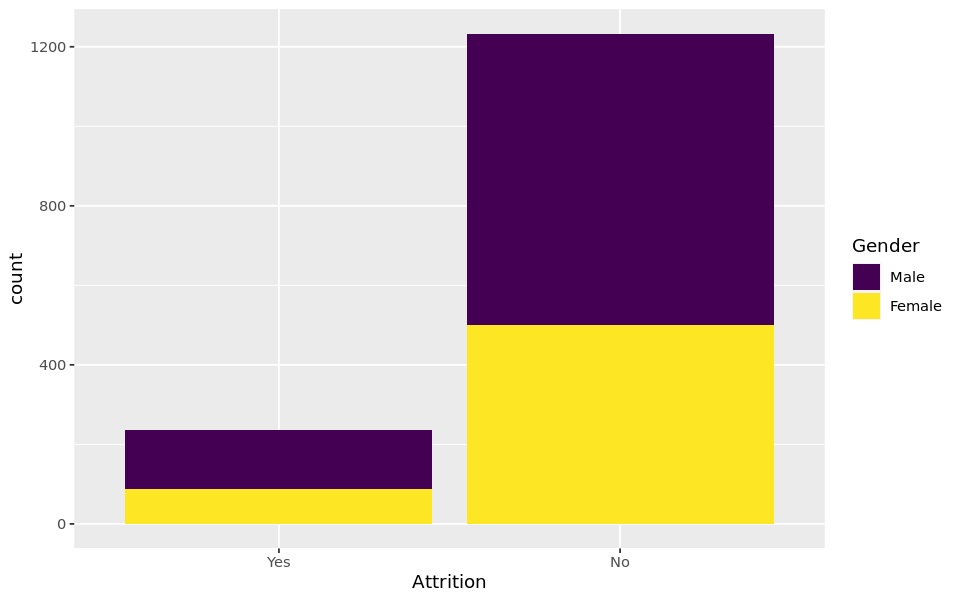

In [202]:
library(tidyverse); library(ggplot2)

options(repr.plot.width=8, repr.plot.height=5)

ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

# Examening the value 'Attrition', we see that there is an imbalance as the majority of data can be found in the category 'no'.
# The dataset is skewed.

<h5>The plot above gives us an idea of what proportions the datasets entirty consists of based on Attrition. <br>We notice a skewness which we will consider in our future interpertations.<h5>
<h5 style="color:blue;">Also we will keep in mind the option to under/over sample the dataset for future classification purposes.<h5>

<h3>In the following we will try to further explore our data by visualizing: <br>
<h5>How does the following parameters influence the attrition:<h5>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


In [203]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition =='Yes')
df_no <- filter(df, Attrition =='No')

<h2>JobSatisfaction<h2>
<h4>In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

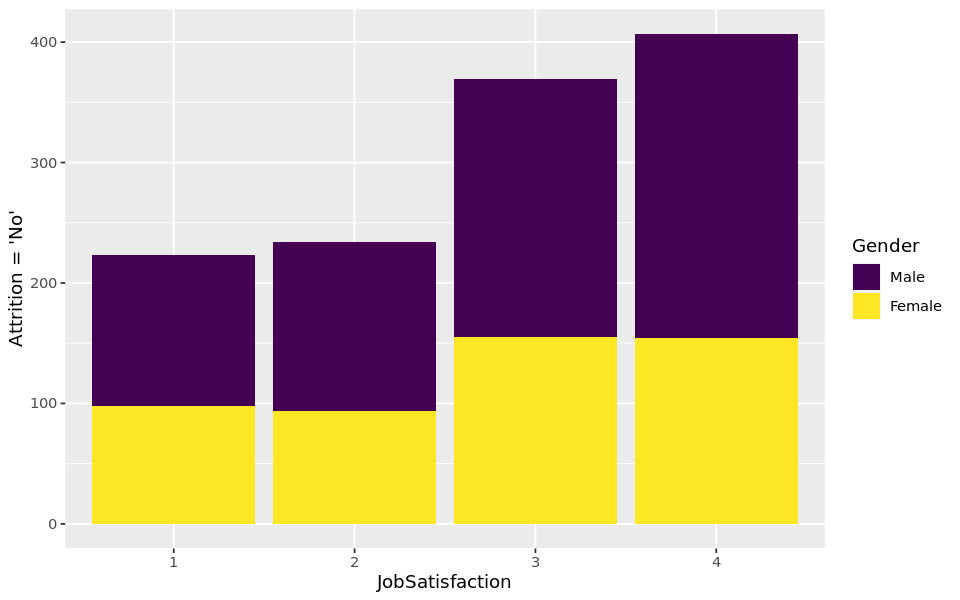

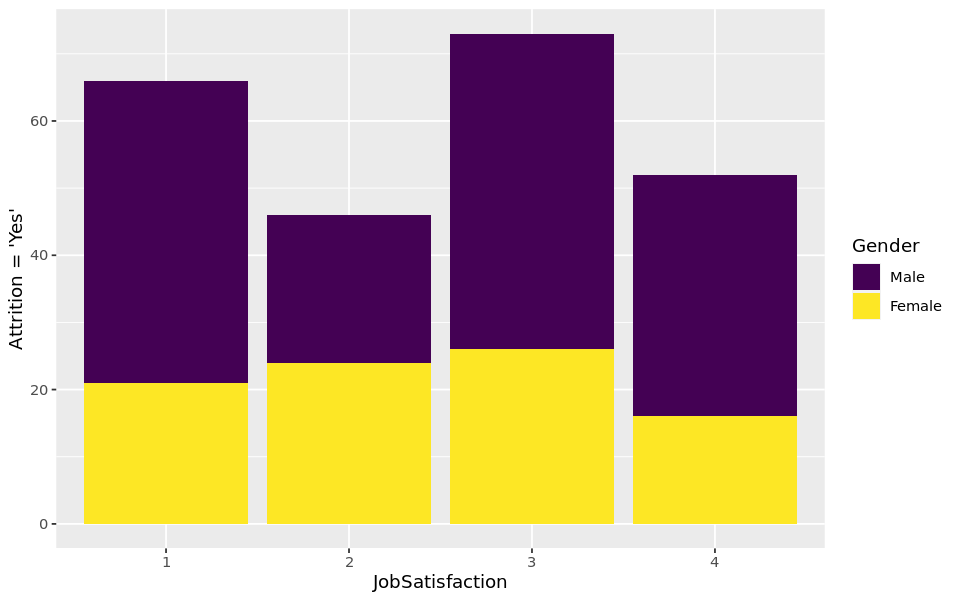

In [204]:
ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")

<h2>DistanceFromHome<h2>
<h4>In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

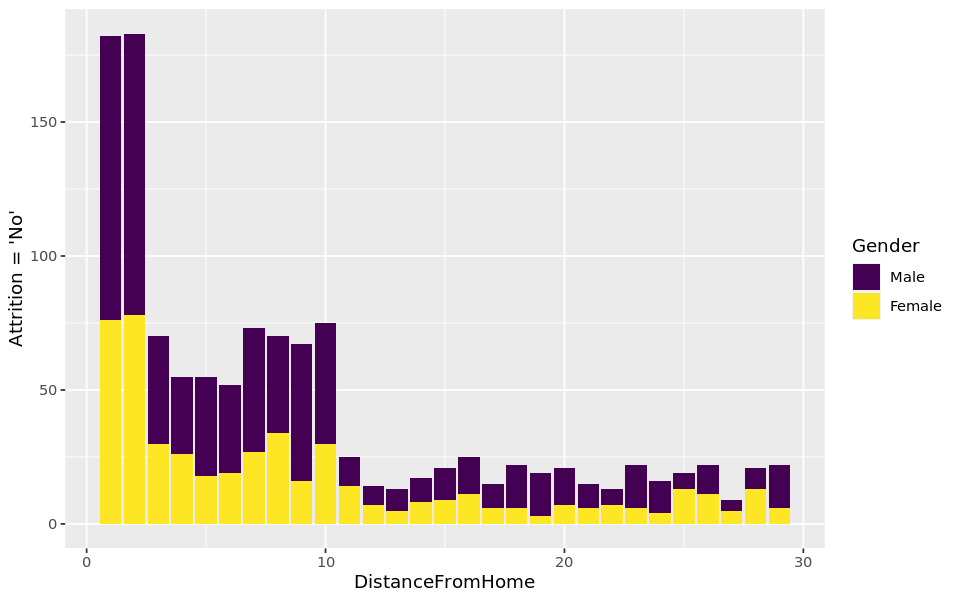

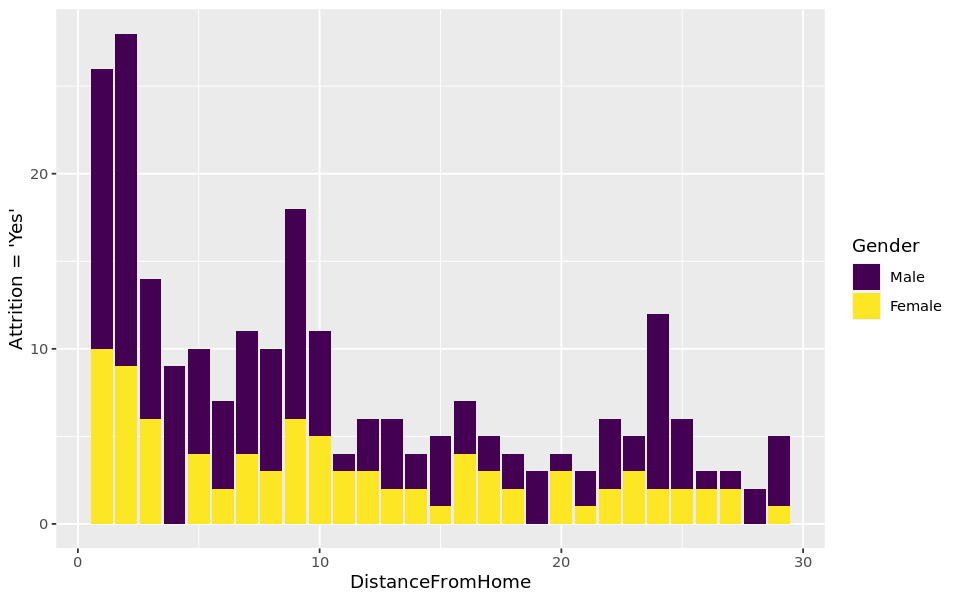

In [205]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")


<h2>MonthlyIncome<h2> 
<h4>In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


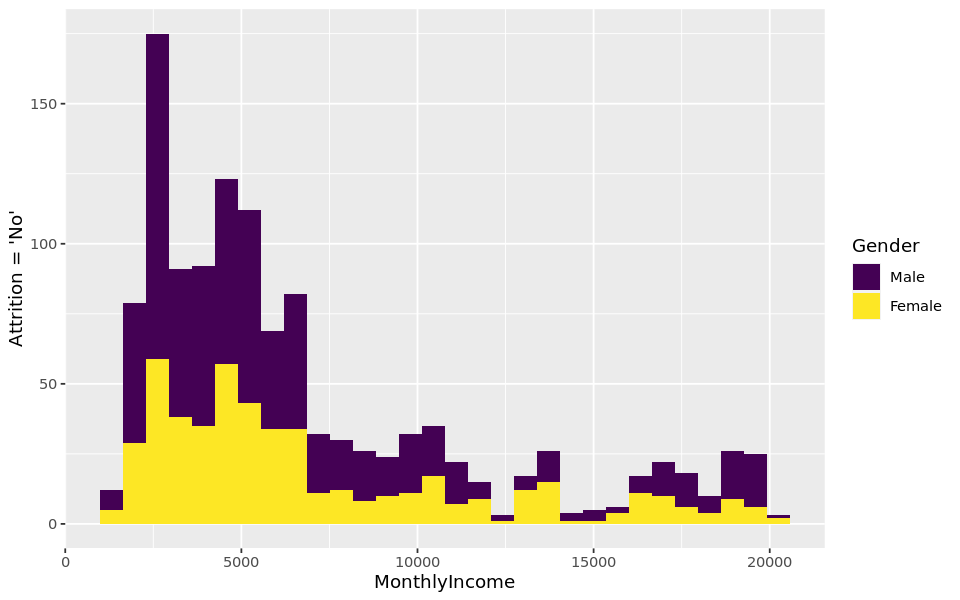

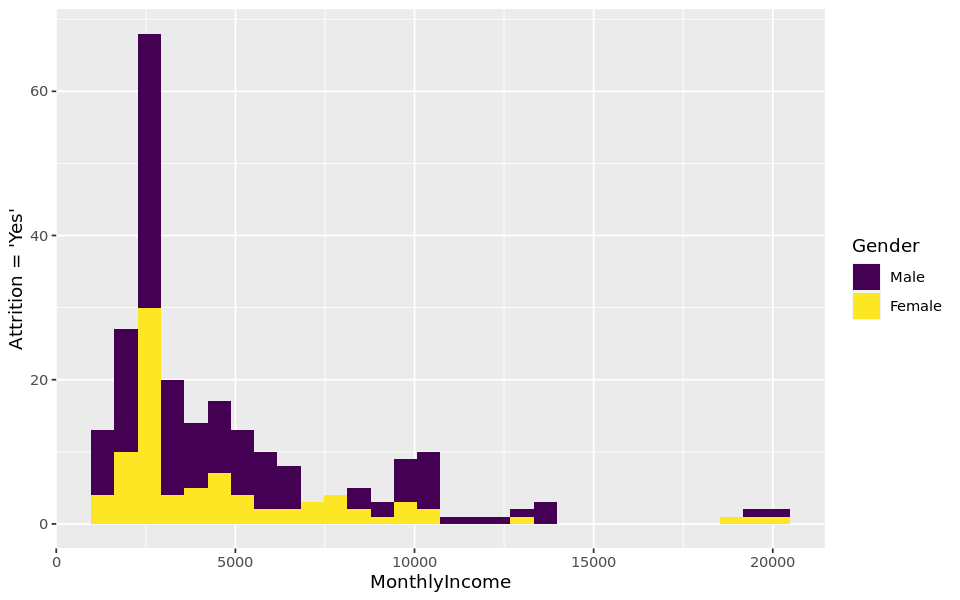

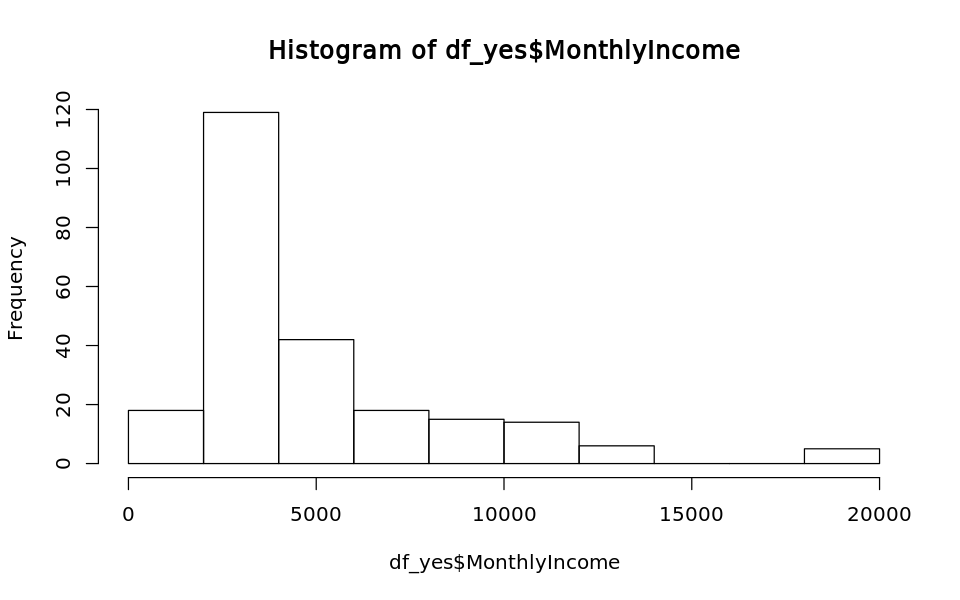

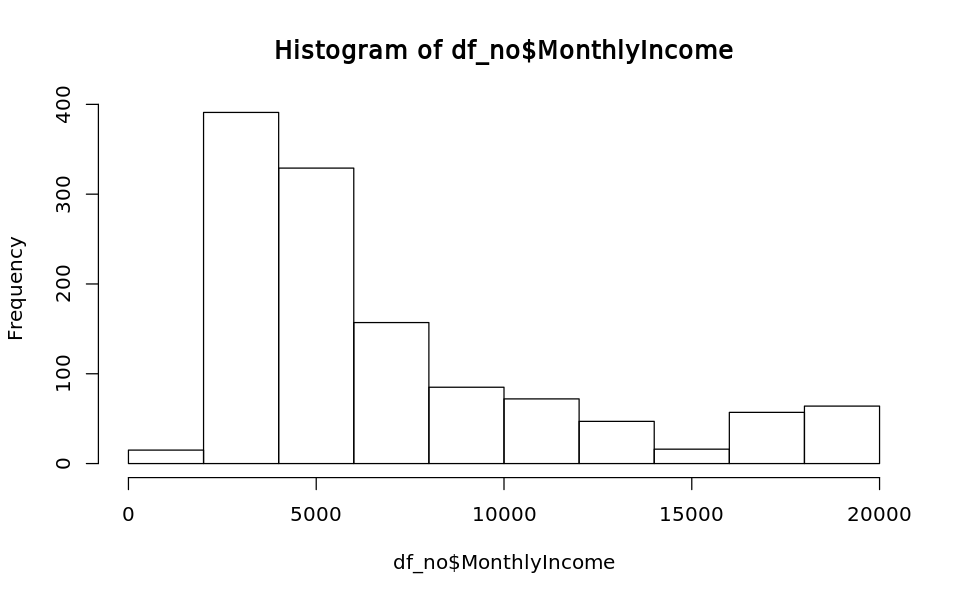

In [206]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'")
hist(df_yes$MonthlyIncome)
hist(df_no$MonthlyIncome)

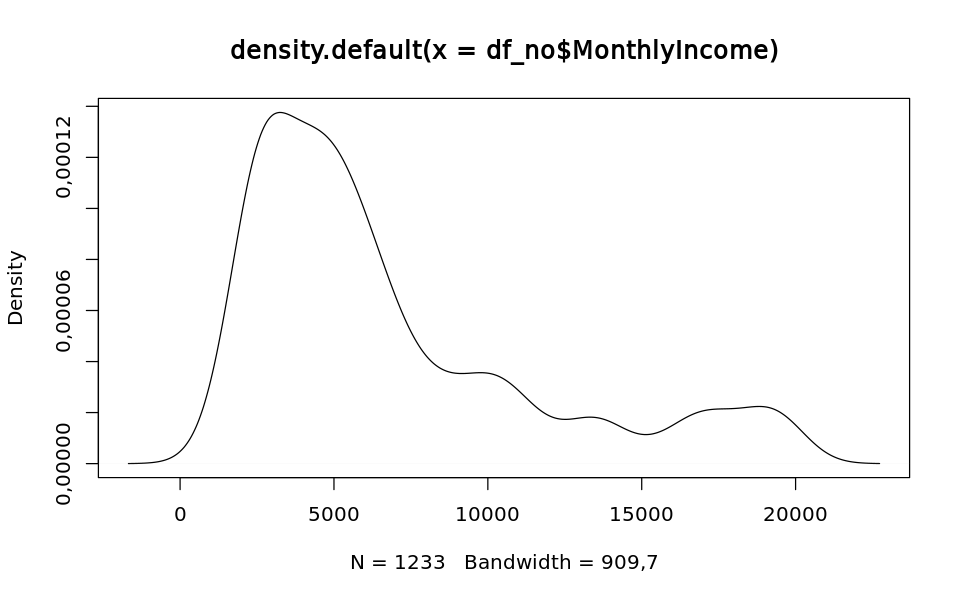

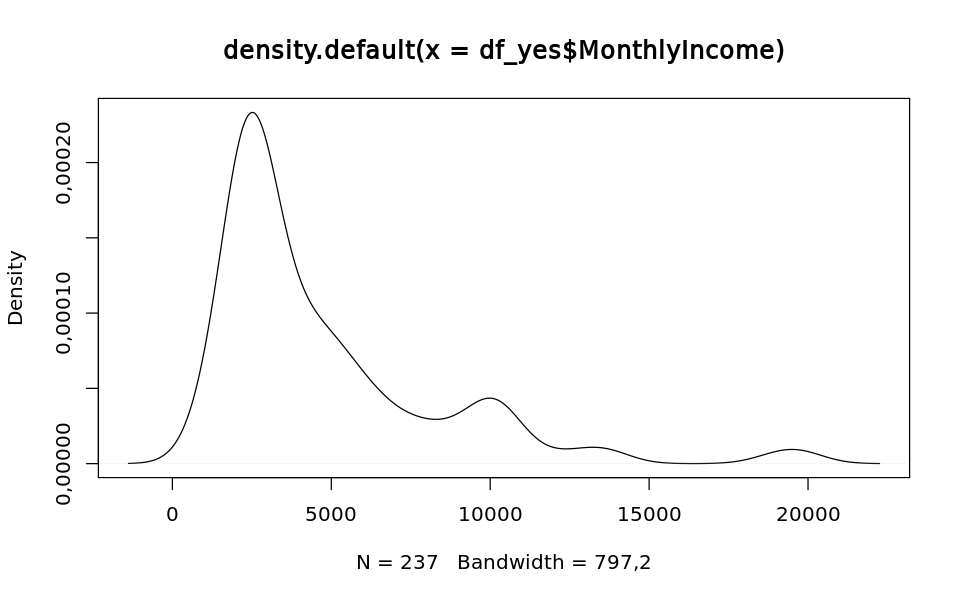

In [207]:
#Simple visualization of the distribution of MonthlyIncome
plot(density(df_no$MonthlyIncome))
plot(density(df_yes$MonthlyIncome))

In [208]:
#This is how we can edit values from words to numeric in the future if required:
#df = mutate(df, Attrition= ifelse(Attrition %in% c("Yes"), "1", "0"))